In [1]:
!pip install osmnx
!pip install geopandas
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.4/338.4 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.14.4
    Uninstalling geopandas-0.14.4:
      Successfully uninstalled geopandas-0.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
bigframes 2.8.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.31.0, but you have google-cloud-bigquery 3.25.0 which is incompatible.
bigframes 2.8.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [2]:
import osmnx as ox
import geopandas as gpd

# 1. National boundary
gdf = ox.geocode_to_gdf("Kenya")  

# 2. Counties (admin_level=4)
counties = ox.features_from_place("Kenya", {"admin_level": "4"})  

# 3. Save both into one GeoPackage (with layers)
gdf.to_file("kenya_admin.gpkg", layer="country", driver="GPKG")
counties.to_file("kenya_admin.gpkg", layer="counties", driver="GPKG")


/usr/local/lib/python3.11/dist-packages/osmnx/_overpass.py:271: UserWarning: This area is 291 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


# Later, load without OSMnx

In [3]:
import geopandas as gpd

# Load from GeoPackage
gdf = gpd.read_file("kenya_admin.gpkg", layer="country")
counties = gpd.read_file("kenya_admin.gpkg", layer="counties")

# If you prefer separate files:

In [4]:
gdf.to_file("kenya_boundary.geojson", driver="GeoJSON")
counties.to_file("kenya_counties.geojson", driver="GeoJSON")

# Reload
gdf = gpd.read_file("kenya_boundary.geojson")
counties = gpd.read_file("kenya_counties.geojson")


gdf_admin will therefore contain:

admin_level=2 (country boundary)

admin_level=4 (counties)

admin_level=5–8+ (sub-counties, wards, locations, villages, etc., depending on OSM coverage)

🔹 Why it’s useful

You get multiple levels of admin boundaries in one go.
→ This is handy if you want to later choose: “show counties”, “show constituencies”, or “show wards”, without re-querying OSM.

You can filter later:


counties = gdf_admin[gdf_admin["admin_level"] == "4"]

wards = gdf_admin[gdf_admin["admin_level"] == "7"]

In [5]:
kenya_poly = gdf.iloc[0].geometry

tags = {"boundary": "administrative"}
gdf_admin = ox.features_from_polygon(kenya_poly, tags)

/usr/local/lib/python3.11/dist-packages/osmnx/_overpass.py:271: UserWarning: This area is 291 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [6]:
gdf_admin

geometry  \
element  id                                                              
relation 192796      POLYGON ((29.57788 -1.12766, 29.57784 -1.12763...   
         192796      POLYGON ((29.57788 -1.12766, 29.57784 -1.12763...   
         192796      POLYGON ((29.57788 -1.12766, 29.57784 -1.12763...   
         192796      POLYGON ((29.57788 -1.12766, 29.57784 -1.12763...   
         192796      POLYGON ((29.57788 -1.12766, 29.57784 -1.12763...   
...                                                                ...   
way      1428216383  LINESTRING (34.68258 0.59621, 34.68276 0.59662...   
         1428216383  LINESTRING (34.68258 0.59621, 34.68276 0.59662...   
         1428216384  LINESTRING (34.69373 0.60546, 34.69374 0.60541...   
         1428217671  LINESTRING (34.6395 0.60547, 34.63955 0.60481,...   
         1428218317  LINESTRING (34.42852 0.57446, 34.42787 0.57431...   

                    admin_level border_type        boundary    name source  \
element  id                                                                  
relation 192796               2         NaN  administrative  Uganda    NaN   
         192796               2         NaN  administrative  Uganda    NaN   
         192796               2         NaN  administrative  Uganda    NaN   
         192796               2         NaN  administrative  Uganda    NaN   
         192796               2         NaN  administrative  Uganda    NaN   
...                         ...         ...             ...     ...    ...   
way      1428216383           8         NaN  administrative     NaN    NaN   
         1428216383           8         NaN  administrative     NaN    NaN   
         1428216384           8         NaN  administrative     NaN    NaN   
         1428217671           8         NaN  administrative     NaN    NaN   
         1428218317           8         NaN  administrative     NaN    NaN   

                    left:country right:country right:province wdb:source  ...  \
element  id                                                               ...   
relation 192796              NaN           NaN            NaN        NaN  ...   
         192796              NaN           NaN            NaN        NaN  ...   
         192796              NaN           NaN            NaN        NaN  ...   
         192796              NaN           NaN            NaN        NaN  ...   
         192796              NaN           NaN            NaN        NaN  ...   
...                          ...           ...            ...        ...  ...   
way      1428216383          NaN           NaN            NaN        NaN  ...   
         1428216383          NaN           NaN            NaN        NaN  ...   
         1428216384          NaN           NaN            NaN        NaN  ...   
         1428217671          NaN           NaN            NaN        NaN  ...   
         1428218317          NaN           NaN            NaN        NaN  ...   

                    population:2010:source source_ref disused:id households  \
element  id                                                                   
relation 192796                        NaN        NaN        NaN        NaN   
         192796                        NaN        NaN        NaN        NaN   
         192796                        NaN        NaN        NaN        NaN   
         192796                        NaN        NaN        NaN        NaN   
         192796                        NaN        NaN        NaN        NaN   
...                                    ...        ...        ...        ...   
way      1428216383                    NaN        NaN        NaN        NaN   
         1428216383                    NaN        NaN        NaN        NaN   
         1428216384                    NaN        NaN        NaN        NaN   
         1428217671                    NaN        NaN        NaN        NaN   
         1428218317                    NaN        NaN        NaN        NaN   

  

In [7]:
print(gdf_admin.columns.tolist())

['geometry', 'admin_level', 'border_type', 'boundary', 'name', 'source', 'left:country', 'right:country', 'right:province', 'wdb:source', 'disputed_by', 'name:ar', 'alt_name', 'name:ru', 'name:uk', 'waterway', 'name:en', 'name:fr', 'right:district', 'left:district', 'left:province', 'right:state', 'right:region', 'layer', 'admin_type:UG', 'note', 'name:de', 'fixme', 'maritime', 'name:ca', 'wikidata', 'wikipedia', 'attribution', 'source:date', 'left:state', 'natural', 'name:am', 'name:bg', 'name:br', 'name:cs', 'name:da', 'name:eo', 'name:es', 'name:et', 'name:he', 'name:hi', 'name:hr', 'name:hu', 'name:is', 'name:it', 'name:ja', 'name:jv', 'name:ko', 'name:ku', 'name:lt', 'name:nl', 'name:no', 'name:pl', 'name:pt', 'name:sl', 'name:sw', 'name:ta', 'name:ur', 'name:zh', 'name:azb', 'name:el', 'name:eu', 'name:grc', 'name:ug', 'name:ti', 'name:sr', 'name:om', 'FIXME', 'alt_name:ar', 'alt_name:en', 'place', 'name:aa', 'name:so', 'surface', 'landuse', 'website', 'description', 'name:wal', 

In [8]:
# keep_cols = ["osm_id", "name", "admin_level", "boundary", "geometry"]
# gdf_admin = gdf_admin[keep_cols]

In [9]:
'''
Pulling all admin boundaries is a heavy query (sometimes split into 200+ Overpass sub-queries).
If you save it once:
'''
# gdf_admin.to_file("kenya_admin_levels.gpkg", layer="all_admin", driver="GPKG")
gdf_admin.to_file("kenya_admin_levels.geojson", driver="GeoJSON")


This avoids:

Waiting several minutes for Overpass.

Risk of hitting API rate limits.

Getting different results if OSM data changes tomorrow.

In [10]:
# Read it back
gdf_admin = gpd.read_file("kenya_admin_levels.geojson")

print(gdf_admin.head())
print(gdf_admin.crs)   # check the coordinate system

    element      id admin_level border_type        boundary    name source  \
0  relation  192796           2        None  administrative  Uganda   None   
1  relation  192796           2        None  administrative  Uganda   None   
2  relation  192796           2        None  administrative  Uganda   None   
3  relation  192796           2        None  administrative  Uganda   None   
4  relation  192796           2        None  administrative  Uganda   None   

  left:country right:country right:province  ... source_ref disused:id  \
0         None          None           None  ...       None       None   
1         None          None           None  ...       None       None   
2         None          None           None  ...       None       None   
3         None          None           None  ...       None       None   
4         None          None           None  ...       None       None   

  households households:2002 households:2002:date households:date  \
0       None     

In [11]:
# National boundary
country = gdf_admin[gdf_admin["admin_level"] == "2"]

# Counties
counties = gdf_admin[gdf_admin["admin_level"] == "4"]

# Sub-counties, wards etc. if present
wards = gdf_admin[gdf_admin["admin_level"] == "7"]


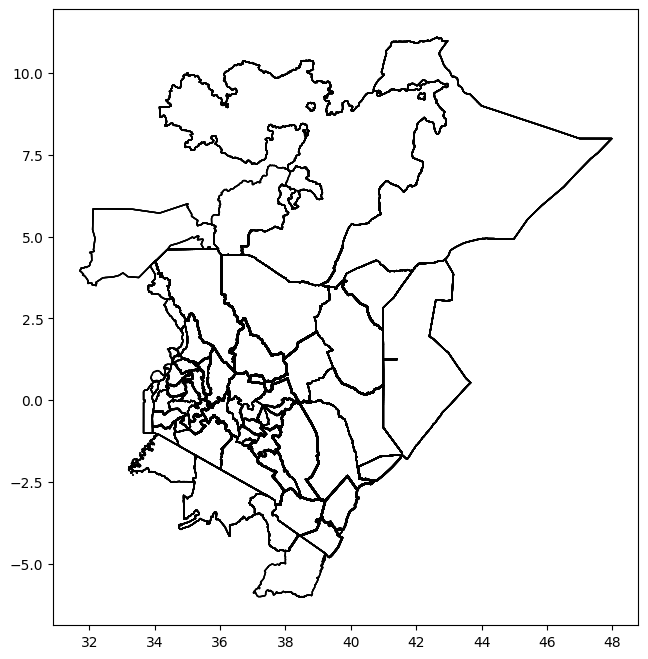

In [12]:
import matplotlib.pyplot as plt

counties.plot(edgecolor="black", facecolor="none", figsize=(8,8))
plt.show()


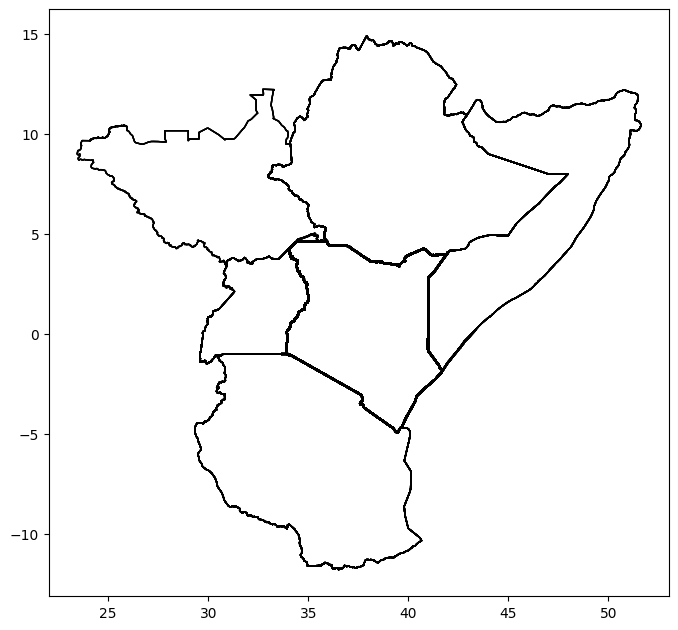

In [13]:
country.plot(edgecolor="black", facecolor="none", figsize=(8,8))
plt.show()

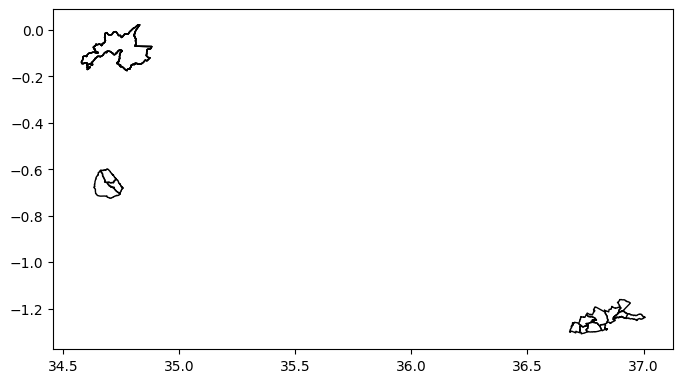

In [14]:
wards.plot(edgecolor="black", facecolor="none", figsize=(8,8))
plt.show()

In [15]:
!rm /kaggle/working/cache/ -r